In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define the model
def model(u,x0,h):
    return x0 + h*(np.asarray([[0,1],[0,0]])@x0 +np.asarray([0,1])*u)


In [3]:
#define the objective function
def objective(u,x_final,x0,*args,**kwargs):
    J = 0.
    for i in u:
        x0 = model(i,x0,*args,**kwargs)
        J += np.sum(np.abs(x0-x_final))
    return J

#Define the constraints 
def constraint_ineq(u,umin,umax,x0,xmin,xmax,*args,**kwargs):
    x = np.zeros((len(u),2))
    for i in range(len(u)):
        x0 = model(u[i],x0,*args,**kwargs)
        x[i,:] = x0
    return np.concatenate([umax-u,u-umin,xmax[0]-x[:,0],xmax[1]-x[:,1],x[:,0]-xmin[0],x[:,1]-xmin[1]])

In [4]:
#define the parameters and the initial values
x0 = np.zeros(2) #intial state
x_final = np.asarray([8.,0.]) #final state
M = 20 #Control horizon
umin = -2.
umax = 2.
u0 = (np.random.rand(M)*(umax-umin)+umin)
xmax = np.asarray([10,2])
xmin = np.asarray([-10,-2])
h = 0.1

#define the type of constraints
constraints = [{'type': 'ineq', 'fun': constraint_ineq, 'args':(umin,umax,x0,xmin,xmax,h)}]

In [5]:
x_ = [x0]
i = 0
u=[]
while sum(abs(x0 -x_final))>=1e-5 and i<=2000:
    i+=1
    result = minimize(objective,args=(x_final,x0,h,),x0=u0,constraints=constraints,method='SLSQP')
    u0 = (np.random.rand(M)*(umax-umin)+umin)
    u0[:-1] = result.x[1:]
    x0 = model(result.x[0],x0,h)
    x_.append(x0)    
    u.append(result.x[0])
    if i%100==0:
        print(x0)
        print(f'iteration {i} completed ')



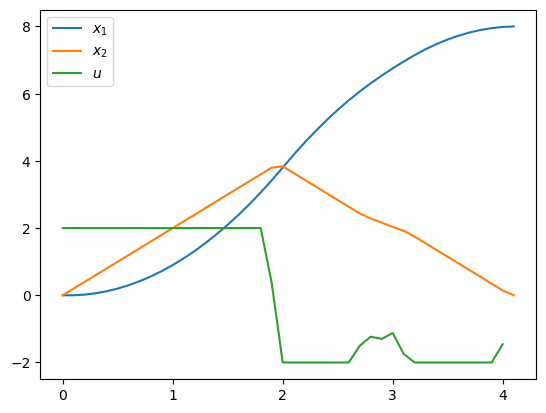

In [6]:
x_ = np.asarray(x_)

fig, ax = plt.subplots()

ax.plot(np.arange(len(x_))*.1,x_[:,0],label = '$x_1$')
ax.plot(np.arange(len(x_))*.1,x_[:,1],label = '$x_2$')
ax.plot(np.arange(len(u))*.1,u,label = '$u$')
ax.legend()
plt.show()